## DÜŞÜK PERFORMANSLI SELLERS

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import sys
sys.path.append("/Users/elifcubukcu/data-context-and-setup")

In [3]:
from olist.data import Olist
from olist.order import Order
olist = Olist()

In [4]:
orders = Order().get_training_data(with_distance_seller_customer=True)
orders.head()

,delay_vs_expected,dim_is_five_star,dim_is_one_star,expected_wait_time,freight_value,number_of_items,number_of_sellers,order_id,order_status,price,review_score,wait_time
0,0.0,0.0,0.0,15.544063,8.72,1.0,1.0,e481f51cbdc54678b7cc49136f2d6af7,delivered,29.99,4.0,8.436574
1,0.0,0.0,0.0,19.137766,22.76,1.0,1.0,53cdb2fc8bc7dce0b6741e2150273451,delivered,118.70,4.0,13.782037
2,0.0,1.0,0.0,26.639711,19.22,1.0,1.0,47770eb9100c2d0c44946d9cf07ec65d,delivered,159.90,5.0,9.394213
3,0.0,1.0,0.0,26.188819,27.20,1.0,1.0,949d5b44dbf5de918fe9c16f97b45f8a,delivered,45.00,5.0,13.208750
4,0.0,1.0,0.0,12.112049,8.72,1.0,1.0,ad21c59c0840e6cb83a9ceb5573f8159,delivered,19.90,5.0,2.873877


In [5]:
order_items = Olist().get_data()['order_items']
order_items.head()
order_items.shape

(112650, 7)

In [6]:
order_seller = pd.merge(orders, order_items, on='order_id', how='inner')
order_seller.head()


,delay_vs_expected,dim_is_five_star,dim_is_one_star,expected_wait_time,freight_value_x,number_of_items,number_of_sellers,order_id,order_status,price_x,review_score,wait_time,order_item_id,product_id,seller_id,shipping_limit_date,price_y,freight_value_y
0,0.0,0.0,0.0,15.544063,8.72,1.0,1.0,e481f51cbdc54678b7cc49136f2d6af7,delivered,29.99,4.0,8.436574,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,0.0,0.0,0.0,19.137766,22.76,1.0,1.0,53cdb2fc8bc7dce0b6741e2150273451,delivered,118.70,4.0,13.782037,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,0.0,1.0,0.0,26.639711,19.22,1.0,1.0,47770eb9100c2d0c44946d9cf07ec65d,delivered,159.90,5.0,9.394213,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,0.0,1.0,0.0,26.188819,27.20,1.0,1.0,949d5b44dbf5de918fe9c16f97b45f8a,delivered,45.00,5.0,13.208750,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,0.0,1.0,0.0,12.112049,8.72,1.0,1.0,ad21c59c0840e6cb83a9ceb5573f8159,delivered,19.90,5.0,2.873877,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [7]:
order_seller.drop(columns=['delay_vs_expected', 'dim_is_five_star', 'dim_is_one_star', 'expected_wait_time', 'wait_time','shipping_limit_date'],inplace=True)


HER ORDER'IN REVIEW COSTU

In [8]:
cost_map = {
    1: 100,
    2: 50,
    3: 40,
    4: 0,
    5: 0
}

In [9]:
order_seller["review_cost"] = order_seller["review_score"].map(cost_map)
order_seller.head()

,freight_value_x,number_of_items,number_of_sellers,order_id,order_status,price_x,review_score,order_item_id,product_id,seller_id,price_y,freight_value_y,review_cost
0,8.72,1.0,1.0,e481f51cbdc54678b7cc49136f2d6af7,delivered,29.99,4.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,0
1,22.76,1.0,1.0,53cdb2fc8bc7dce0b6741e2150273451,delivered,118.70,4.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,0
2,19.22,1.0,1.0,47770eb9100c2d0c44946d9cf07ec65d,delivered,159.90,5.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,0
3,27.20,1.0,1.0,949d5b44dbf5de918fe9c16f97b45f8a,delivered,45.00,5.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,0
4,8.72,1.0,1.0,ad21c59c0840e6cb83a9ceb5573f8159,delivered,19.90,5.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,0


In [10]:
order_seller.columns

Index(['freight_value_x', 'number_of_items', 'number_of_sellers', 'order_id',
       'order_status', 'price_x', 'review_score', 'order_item_id',
       'product_id', 'seller_id', 'price_y', 'freight_value_y', 'review_cost'],
      dtype='object')

In [11]:
delivered = order_seller[order_seller["order_status"] == "delivered"].copy()
delivered["sales_fee"] = delivered["price_x"] * 0.10

In [12]:
seller_df = (
    delivered
    .groupby("seller_id")
    .agg(
        sales_fee=("sales_fee", "sum"),
        n_orders=("order_id", "nunique"),
        total_review_cost=("review_cost", "sum")
    )
    .reset_index()
)
seller_df.head()

,seller_id,sales_fee,n_orders,total_review_cost
0,0015a82c2db000af6aaaf3ae2ecb0532,268.500,3,100
1,001cca7ae9ae17fb1caed9dfb1094831,3505.491,192,4250
2,002100f778ceb8431b7a1020ff7ab48f,149.960,50,1010
3,003554e2dce176b5555353e4f3555ac8,12.000,1,0
4,004c9cd9d87a3c30c522c48c4fc07416,2418.148,154,2610


In [13]:
from olist.seller import Seller

olist = Seller()
training_data = olist.get_training_data()
seller_months = training_data[["seller_id", "months_on_olist"]].copy()

In [14]:
seller_final = seller_df.merge(seller_months, on="seller_id", how="left")

In [15]:
seller_final["months_on_olist"] = seller_final["months_on_olist"].fillna(0)

In [16]:
seller_final["subscription_fee"] = seller_final["months_on_olist"] * 80
seller_final["revenue"] = seller_final["sales_fee"] + seller_final["subscription_fee"]
seller_final["profit"] = seller_final["revenue"] - seller_final["total_review_cost"]

In [17]:
seller_final = seller_final[["seller_id", "revenue", "total_review_cost", "profit"]]

seller_final

,seller_id,revenue,total_review_cost,profit
0,0015a82c2db000af6aaaf3ae2ecb0532,348.500,100,248.500
1,001cca7ae9ae17fb1caed9dfb1094831,4865.491,4250,615.491
2,002100f778ceb8431b7a1020ff7ab48f,709.960,1010,-300.040
3,003554e2dce176b5555353e4f3555ac8,12.000,0,12.000
4,004c9cd9d87a3c30c522c48c4fc07416,3618.148,2610,1008.148
...,...,...,...,...
2960,ffc470761de7d0232558ba5e786e57b7,667.156,400,267.156
2961,ffdd9f82b9a447f6f8d4b91554cc7dd3,1705.640,240,1465.640
2962,ffeee66ac5d5a62fe688b9d26f83f534,823.986,200,623.986
2963,fffd5413c0700ac820c7069d66d98c89,1937.582,1220,717.582


### 2.2 IT Maliyetleri Hariç Varsayım Analizi

In [18]:
from olist.seller import Seller

olist = Seller()
seller_final = olist.get_profit_table()

seller_final.head()

,seller_id,revenue,total_review_cost,profit,items_sold
0,0015a82c2db000af6aaaf3ae2ecb0532,348.500,100.0,248.500,3
1,001cca7ae9ae17fb1caed9dfb1094831,3808.703,3060.0,748.703,234
2,002100f778ceb8431b7a1020ff7ab48f,681.660,1010.0,-328.340,54
3,003554e2dce176b5555353e4f3555ac8,92.000,0.0,92.000,1
4,004c9cd9d87a3c30c522c48c4fc07416,3156.973,2380.0,776.973,168


In [19]:
df = seller_final.sort_values("profit", ascending=False).reset_index(drop=True)

df["cum_revenue"] = df["revenue"].cumsum()
df["cum_profit"] = df["profit"].cumsum()
df["cum_items_sold"] = df["items_sold"].cumsum()

df.head()

,seller_id,revenue,total_review_cost,profit,items_sold,cum_revenue,cum_profit,cum_items_sold
0,53243585a1d6dc2643021fd1853d8905,22754.044,4480.0,18274.044,400,22754.044,18274.044,400
1,7e93a43ef30c4f03f38b393420bc753a,18278.149,3220.0,15058.149,322,41032.193,33332.193,722
2,fa1c13f2614d7b5c4749cbc52fecda94,20691.714,5960.0,14731.714,579,61723.907,48063.907,1301
3,46dc3b2cc0980fb8ec44634e21d2718e,14121.138,6210.0,7911.138,523,75845.045,55975.045,1824
4,edb1ef5e36e0c8cd84eb3c9b003e486d,8794.490,1420.0,7374.490,174,84639.535,63349.535,1998


<Axes: >

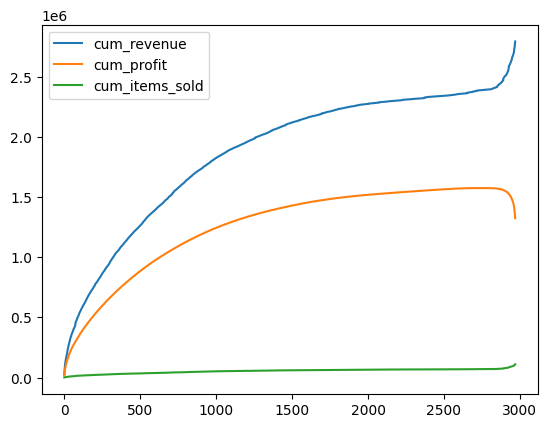

In [20]:
df[["cum_revenue", "cum_profit", "cum_items_sold"]].plot()

In [21]:
k_opt = int(np.argmax(df["cum_profit"].values)) + 1

impact = {
    "optimum_seller_count": k_opt,
    "net_profit_before_it_costs": float(df.loc[k_opt - 1, "cum_profit"]),
    "total_revenues": float(df.loc[k_opt - 1, "cum_revenue"]),
    "items_sold": int(df.loc[k_opt - 1, "cum_items_sold"]),
}

impact


{'optimum_seller_count': 2721,
 'net_profit_before_it_costs': 1575959.074999984,
 'total_revenues': 2387569.075000011,
 'items_sold': 69758}

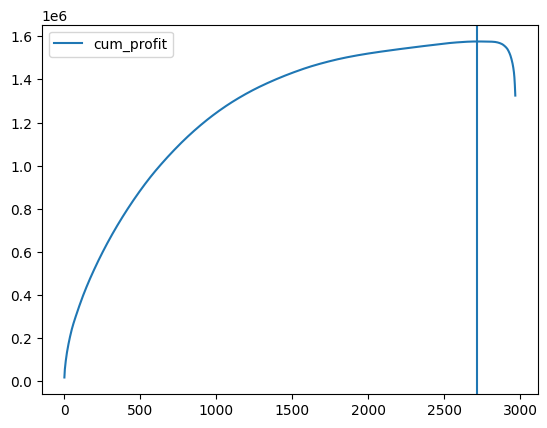

In [22]:
ax = df[["cum_profit"]].plot()
ax.axvline(k_opt - 1)

### 2.3 IT maliyetleri ile varsayımsal analiz

In [23]:
from olist.seller import Seller

olist = Seller()
seller_it = olist.get_profit_table()

seller_it.head()

,seller_id,revenue,total_review_cost,profit,items_sold
0,0015a82c2db000af6aaaf3ae2ecb0532,348.500,100.0,248.500,3
1,001cca7ae9ae17fb1caed9dfb1094831,3808.703,3060.0,748.703,234
2,002100f778ceb8431b7a1020ff7ab48f,681.660,1010.0,-328.340,54
3,003554e2dce176b5555353e4f3555ac8,92.000,0.0,92.000,1
4,004c9cd9d87a3c30c522c48c4fc07416,3156.973,2380.0,776.973,168


In [24]:
import numpy as np

ALPHA = 3157.27
BETA  = 978.23

def it_cost(n_sellers, n_items, alpha=ALPHA, beta=BETA):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

In [25]:
seller_it = seller_it.sort_values("profit", ascending=False).reset_index(drop=True)

seller_it["cum_revenue"] = seller_it["revenue"].cumsum()
seller_it["cum_profit"] = seller_it["profit"].cumsum()
seller_it["cum_items_sold"] = seller_it["items_sold"].cumsum()

seller_it.head()

,seller_id,revenue,total_review_cost,profit,items_sold,cum_revenue,cum_profit,cum_items_sold
0,53243585a1d6dc2643021fd1853d8905,22754.044,4480.0,18274.044,400,22754.044,18274.044,400
1,7e93a43ef30c4f03f38b393420bc753a,18278.149,3220.0,15058.149,322,41032.193,33332.193,722
2,fa1c13f2614d7b5c4749cbc52fecda94,20691.714,5960.0,14731.714,579,61723.907,48063.907,1301
3,46dc3b2cc0980fb8ec44634e21d2718e,14121.138,6210.0,7911.138,523,75845.045,55975.045,1824
4,edb1ef5e36e0c8cd84eb3c9b003e486d,8794.490,1420.0,7374.490,174,84639.535,63349.535,1998


In [28]:
seller_it["cum_sellers"] = np.arange(1, len(df) + 1)
seller_it

,seller_id,revenue,total_review_cost,profit,items_sold,cum_revenue,cum_profit,cum_items_sold,cum_sellers
0,53243585a1d6dc2643021fd1853d8905,22754.044,4480.0,18274.044,400,22754.044,18274.044,400,1
1,7e93a43ef30c4f03f38b393420bc753a,18278.149,3220.0,15058.149,322,41032.193,33332.193,722,2
2,fa1c13f2614d7b5c4749cbc52fecda94,20691.714,5960.0,14731.714,579,61723.907,48063.907,1301,3
3,46dc3b2cc0980fb8ec44634e21d2718e,14121.138,6210.0,7911.138,523,75845.045,55975.045,1824,4
4,edb1ef5e36e0c8cd84eb3c9b003e486d,8794.490,1420.0,7374.490,174,84639.535,63349.535,1998,5
...,...,...,...,...,...,...,...,...,...
2965,8b321bb669392f5163d04c59e235e066,2526.294,14440.0,-11913.706,1005,2744132.544,1388432.544,103345,2966
2966,cc419e0650a3c5ba77189a1882b7556a,11629.096,25220.0,-13590.904,1719,2755761.640,1374841.640,105064,2967
2967,ea8482cd71df3c1969d7b9473ff13abc,4629.676,19020.0,-14390.324,1188,2760391.316,1360451.316,106252,2968
2968,4a3ca9315b744ce9f8e9374361493884,21288.212,37540.0,-16251.788,1949,2781679.528,1344199.528,108201,2969


In [30]:
seller_it["cum_it_cost"] = it_cost(seller_it["cum_sellers"], seller_it["cum_items_sold"])
seller_it["cum_net_profit"] = seller_it["cum_profit"] - seller_it["cum_it_cost"]

seller_it.head()

,seller_id,revenue,total_review_cost,profit,items_sold,cum_revenue,cum_profit,cum_items_sold,cum_sellers,cum_it_cost,cum_net_profit
0,53243585a1d6dc2643021fd1853d8905,22754.044,4480.0,18274.044,400,22754.044,18274.044,400,1,22721.870000,-4447.826000
1,7e93a43ef30c4f03f38b393420bc753a,18278.149,3220.0,15058.149,322,41032.193,33332.193,722,2,30750.150583,2582.042417
2,fa1c13f2614d7b5c4749cbc52fecda94,20691.714,5960.0,14731.714,579,61723.907,48063.907,1301,3,40752.699297,7311.207703
3,46dc3b2cc0980fb8ec44634e21d2718e,14121.138,6210.0,7911.138,523,75845.045,55975.045,1824,4,48093.093034,7881.951966
4,edb1ef5e36e0c8cd84eb3c9b003e486d,8794.490,1420.0,7374.490,174,84639.535,63349.535,1998,5,50785.766537,12563.768463


In [32]:
opt_idx = seller_it["cum_net_profit"].idxmax()

opt_n_sellers    = int(seller_it.loc[opt_idx, "cum_sellers"])
opt_net_profit   = float(seller_it.loc[opt_idx, "cum_net_profit"])
opt_gross_profit = float(seller_it.loc[opt_idx, "cum_profit"])
opt_it_cost      = float(seller_it.loc[opt_idx, "cum_it_cost"])
opt_revenue      = float(seller_it.loc[opt_idx, "cum_revenue"])
opt_items        = float(seller_it.loc[opt_idx, "cum_items_sold"])

(opt_n_sellers, opt_net_profit, opt_gross_profit, opt_it_cost, opt_revenue, opt_items)

(2650,
 1155786.5819283486,
 1574702.8559999843,
 418916.2740716357,
 2364142.8560000104,
 68692.0)

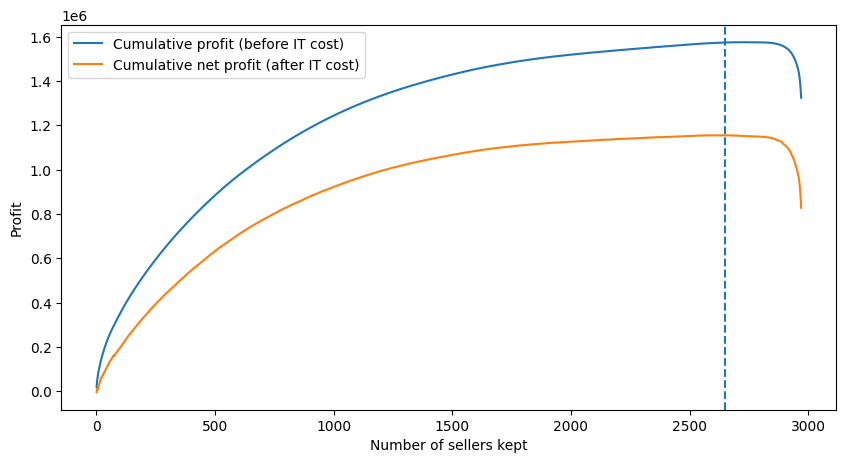

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(seller_it["cum_sellers"], seller_it["cum_profit"], label="Cumulative profit (before IT cost)")
plt.plot(seller_it["cum_sellers"], seller_it["cum_net_profit"], label="Cumulative net profit (after IT cost)")
plt.axvline(opt_n_sellers, linestyle="--")
plt.xlabel("Number of sellers kept")
plt.ylabel("Profit")
plt.legend()
plt.show()

In [34]:
print("OPTIMUM (after IT cost)")
print("seller_count:", opt_n_sellers)
print("sold_items:", opt_items)
print("total_revenue:", opt_revenue)
print("it_cost:", opt_it_cost)
print("net_profit_after_it:", opt_net_profit)
print("profit_before_it:", opt_gross_profit)

OPTIMUM (after IT cost)
seller_count: 2650
sold_items: 68692.0
total_revenue: 2364142.8560000104
it_cost: 418916.2740716357
net_profit_after_it: 1155786.5819283486
profit_before_it: 1574702.8559999843
